In [ ]:
from google.colab import drive
#mount google drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, matthews_corrcoef

# Dataset
This is a csv file containing related information of 5172 randomly picked email files and their respective labels for spam or not-spam classification.



In [ ]:
df = pd.read_csv("emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


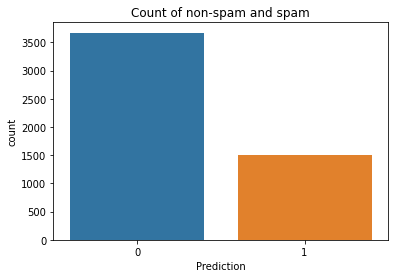

In [ ]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='Prediction', data=df)
plt.title("Count of non-spam and spam")
plt.show()

splitting data into train and test 

In [ ]:
X = df.iloc[:,1:3001]
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=5)

# Baseline model

In [ ]:
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print("Train Results \n")
y_train_pred  = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]


print("\nAccuracy Score for Train : ", accuracy_score(y_train, y_train_pred))
print("ROC AUC for Train : ", roc_auc_score(y_train, y_train_prob))
print("\nConfusion Matrix for Train : \n", confusion_matrix(y_train, y_train_pred))
print("\nclassification report:\n", classification_report(y_train, y_train_pred))
print("\nMatthews correlation coefficient (MCC):", matthews_corrcoef(y_train, y_train_pred))

Train Results 


Accuracy Score for Train :  1.0
ROC AUC for Train :  0.9999999999999999

Confusion Matrix for Train : 
 [[2782    0]
 [   0 1097]]

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2782
           1       1.00      1.00      1.00      1097

    accuracy                           1.00      3879
   macro avg       1.00      1.00      1.00      3879
weighted avg       1.00      1.00      1.00      3879


Matthews correlation coefficient (MCC): 1.0


In [ ]:
print("Test Results \n")
y_test_pred  = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]


print("Accuracy Score for Test\n : ", accuracy_score(y_test, y_test_pred))
print("ROC AUC for Test :\n ", roc_auc_score(y_test, y_test_prob))
print("Confusion Matrix for Test : \n", confusion_matrix(y_test, y_test_pred))
print("classification report:\n", classification_report(y_test, y_test_pred))
print("\nMatthews correlation coefficient (MCC):", matthews_corrcoef(y_test, y_test_pred))


Test Results 

Accuracy Score for Test
 :  0.9767981438515081
ROC AUC for Test :
  0.9970446371316252
Confusion Matrix for Test : 
 [[881   9]
 [ 21 382]]
classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       890
           1       0.98      0.95      0.96       403

    accuracy                           0.98      1293
   macro avg       0.98      0.97      0.97      1293
weighted avg       0.98      0.98      0.98      1293


Matthews correlation coefficient (MCC): 0.9457059723930833


model is overfitting - learning too much from the data.


# Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print("Train Results \n")
y_train_pred  = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print("\nAccuracy Score for Train : ", accuracy_score(y_train, y_train_pred))
print("ROC AUC for Train : ", roc_auc_score(y_train, y_train_prob))
print("\nConfusion Matrix for Train : \n", confusion_matrix(y_train, y_train_pred))
print("\nclassification report:\n", classification_report(y_train, y_train_pred))
print("\nMatthews correlation coefficient (MCC):", matthews_corrcoef(y_train, y_train_pred))

Train Results 


Accuracy Score for Train :  1.0
ROC AUC for Train :  1.0

Confusion Matrix for Train : 
 [[2782    0]
 [   0 1097]]

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2782
           1       1.00      1.00      1.00      1097

    accuracy                           1.00      3879
   macro avg       1.00      1.00      1.00      3879
weighted avg       1.00      1.00      1.00      3879


Matthews correlation coefficient (MCC): 1.0


In [ ]:
print("Test Results \n")
y_test_pred  = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]


print("Accuracy Score for Test\n : ", accuracy_score(y_test, y_test_pred))
print("ROC AUC for Test :\n ", roc_auc_score(y_test, y_test_prob))
print("Confusion Matrix for Test : \n", confusion_matrix(y_test, y_test_pred))
print("classification report:\n", classification_report(y_test, y_test_pred))
print("\nMatthews correlation coefficient (MCC):", matthews_corrcoef(y_test, y_test_pred))

Test Results 

Accuracy Score for Test
 :  0.9760247486465584
ROC AUC for Test :
  0.9970418490534474
Confusion Matrix for Test : 
 [[881   9]
 [ 22 381]]
classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       890
           1       0.98      0.95      0.96       403

    accuracy                           0.98      1293
   macro avg       0.98      0.97      0.97      1293
weighted avg       0.98      0.98      0.98      1293


Matthews correlation coefficient (MCC): 0.9438889924885592


# PCA 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print("Train Results \n")
y_train_pred  = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print("\nAccuracy Score for Train : ", accuracy_score(y_train, y_train_pred))
print("ROC AUC for Train : ", roc_auc_score(y_train, y_train_prob))
print("\nConfusion Matrix for Train : \n", confusion_matrix(y_train, y_train_pred))
print("\nclassification report:\n", classification_report(y_train, y_train_pred))
print("\nMatthews correlation coefficient (MCC):", matthews_corrcoef(y_train, y_train_pred))

Train Results 


Accuracy Score for Train :  1.0
ROC AUC for Train :  1.0

Confusion Matrix for Train : 
 [[2782    0]
 [   0 1097]]

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2782
           1       1.00      1.00      1.00      1097

    accuracy                           1.00      3879
   macro avg       1.00      1.00      1.00      3879
weighted avg       1.00      1.00      1.00      3879


Matthews correlation coefficient (MCC): 1.0


In [ ]:
print("Test Results \n")
y_test_pred  = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print("Accuracy Score for Test\n : ", accuracy_score(y_test, y_test_pred))
print("ROC AUC for Test :\n ", roc_auc_score(y_test, y_test_prob))
print("Confusion Matrix for Test : \n", confusion_matrix(y_test, y_test_pred))
print("classification report:\n", classification_report(y_test, y_test_pred))
print("\nMatthews correlation coefficient (MCC):", matthews_corrcoef(y_test, y_test_pred))

Test Results 

Accuracy Score for Test
 :  0.9520494972931168
ROC AUC for Test :
  0.9931831488554939
Confusion Matrix for Test : 
 [[874  16]
 [ 46 357]]
classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       890
           1       0.96      0.89      0.92       403

    accuracy                           0.95      1293
   macro avg       0.95      0.93      0.94      1293
weighted avg       0.95      0.95      0.95      1293


Matthews correlation coefficient (MCC): 0.8872748105159453


 hyper-parameter tuning to find best parameters 

# hyper-parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=42)



params = {'n_estimators': sp_randint(50,400),
          'max_features' : sp_randint(2,16),
          'max_depth' : sp_randint(2,10),
          'min_samples_split' : sp_randint(2,25),
          'min_samples_leaf' : sp_randint(1,25),
          'criterion':['gini','entropy']}

rsearch = RandomizedSearchCV(rfc,
                             param_distributions=params,
                             n_iter=50,
                             cv=3, 
                             return_train_score = True,
                             scoring='accuracy',
                             n_jobs=-1,
                            random_state=42)

rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7efde0f00970>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7efde0ef2d00>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7efde0f00070>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7efde0f00460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7efde0f00fd0>},
                   random_state=42, return_train_score=True,
                   scoring='accuracy')

In [ ]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 58}

using optimized parameters

# Best model

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

rfc = RandomForestClassifier(criterion='gini', max_depth=8, max_features=14, min_samples_leaf=1, min_samples_split=8, n_estimators=58, random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=14, min_samples_split=8,
                       n_estimators=58, random_state=42)

In [ ]:
print("Train Results \n")
y_train_pred  = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print("\nAccuracy Score for Train : ", accuracy_score(y_train, y_train_pred))
print("\nROC AUC for Train : ", roc_auc_score(y_train, y_train_prob))
print("\nConfusion Matrix for Train : \n", confusion_matrix(y_train, y_train_pred))
print("\nclassification report:\n", classification_report(y_train, y_train_pred))
print("\nMatthews correlation coefficient (MCC):", matthews_corrcoef(y_train, y_train_pred))

Train Results 


Accuracy Score for Train :  0.9853054911059551

ROC AUC for Train :  0.99934072861939

Confusion Matrix for Train : 
 [[2774    8]
 [  49 1048]]

classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2782
           1       0.99      0.96      0.97      1097

    accuracy                           0.99      3879
   macro avg       0.99      0.98      0.98      3879
weighted avg       0.99      0.99      0.99      3879


Matthews correlation coefficient (MCC): 0.9636956539916872


In [ ]:
print("Test Results \n")
y_test_pred  = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print("Accuracy Score for Test : ", accuracy_score(y_test, y_test_pred))
print("\nROC AUC for Test : ", roc_auc_score(y_test, y_test_prob))
print("Confusion Matrix for Test : \n", confusion_matrix(y_test, y_test_pred))
print("classification report:\n", classification_report(y_test, y_test_pred))
print("\nMatthews correlation coefficient (MCC):", matthews_corrcoef(y_test, y_test_pred))

Test Results 

Accuracy Score for Test :  0.8948182521268369

ROC AUC for Test :  0.9879025287869072
Confusion Matrix for Test : 
 [[882   8]
 [128 275]]
classification report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       890
           1       0.97      0.68      0.80       403

    accuracy                           0.89      1293
   macro avg       0.92      0.84      0.87      1293
weighted avg       0.90      0.89      0.89      1293


Matthews correlation coefficient (MCC): 0.7543318719468923


model is not overfitted.

**ROC-AUC Curve for Test Data¶**



In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_prob)
thresholds[0] = thresholds[0]-1

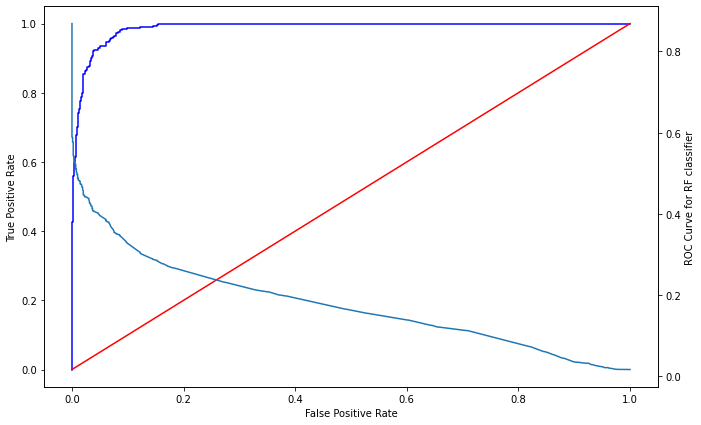

In [ ]:
fig, bx = plt.subplots(figsize=(11,7))
bx.plot(fpr,tpr,'blue')
bx.plot(fpr,fpr,'red')
bx1=bx.twinx()
bx1.plot(fpr,thresholds)
bx1.set_ylabel("ROC Curve for RF classifier")
bx.set_xlabel("False Positive Rate")
bx.set_ylabel("True Positive Rate")
plt.show()

